In [1]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.support_functions import *

## Data import and manipulation

In [2]:
#Import Schizophrenia data
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose/Patient')
files = os.listdir()
files.sort(key=natural_keys)
shizophrenia_p = list()
for i in range(0,len(files)):
    shizophrenia_p.append(pd.read_csv(files[i]))
    
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose/control')
files = os.listdir()
files.sort(key=natural_keys)
shizophrenia_c = list()
for i in range(0,len(files)):
    shizophrenia_c.append(pd.read_csv(files[i]))
#Import demographics on Schizophrenia patients
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose')
patients_info = pd.read_csv('patients_info.csv')
#Import demographics on control group 
control_info = pd.read_csv('scores.csv')


In [3]:
#Convert strings to datetime 
for i in range(0, len(shizophrenia_c)):
    shizophrenia_c[i]['timestamp'] = pd.to_datetime(shizophrenia_c[i]['timestamp'],format='%Y-%m-%d %H:%M:%S')
    shizophrenia_c[i] = shizophrenia_c[i].drop(['date'], axis=1)

#Convert strings to datetime 
for i in range(0, len(shizophrenia_p)):
    shizophrenia_p[i]['timestamp'] = shizophrenia_p[i]['timestamp'].astype('datetime64[ns]')
    shizophrenia_p[i] = shizophrenia_p[i].drop(['date'], axis=1)


## Example plot of Actigraph time series  

(-246.35000000000002, 5100)

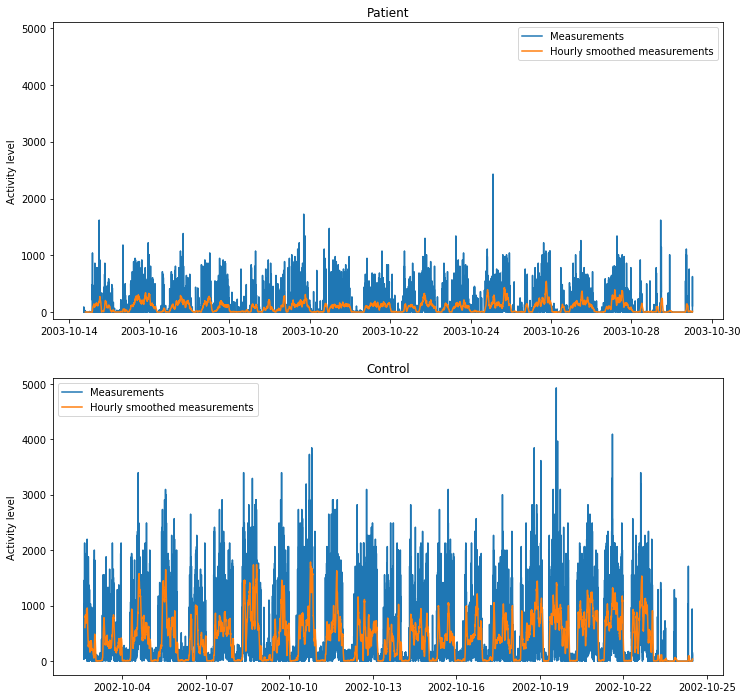

In [47]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(shizophrenia_p[10]['timestamp'],shizophrenia_p[10]['activity'])
ax1.plot(shizophrenia_p[10]['timestamp'],shizophrenia_p[10]['activity'].rolling(60).mean())
ax1.set_ylabel('Activity level')
ax1.legend(['Measurements','Hourly smoothed measurements'])
ax1.set_title('Patient')
ax1.set_ylim(top=5100)

ax2.plot(shizophrenia_c[1]['timestamp'],shizophrenia_c[1]['activity'])
ax2.plot(shizophrenia_c[1]['timestamp'],shizophrenia_c[1]['activity'].rolling(60).mean())
#ax2.xticks(rotation=45)
ax2.set_ylabel('Activity level')
ax2.legend(['Measurements','Hourly smoothed measurements'])
ax2.set_title('Control')
ax2.set_ylim(top=5100)


In [5]:
#get daily data for patients
patients_daily = list()
for i in range(0,len(shizophrenia_p)):
    patients_daily.append(get_intervals(shizophrenia_p[i],intervals = 0))

# get day and night data for patients 
patients_day = list()
for i in range(0,len(shizophrenia_p)):
    patients_day.append(get_intervals(shizophrenia_p[i],intervals = 1))

patients_night = list()
for i in range(0,len(shizophrenia_p)):
    patients_night.append(get_intervals(shizophrenia_p[i],intervals = 2))

In [6]:
#get daily data for control group
control_daily = list()
for i in range(0,len(shizophrenia_c)):
    control_daily.append(get_intervals(shizophrenia_c[i],intervals = 0))

# get day and night data for patients 
control_day = list()
for i in range(0,len(shizophrenia_c)):
    control_day.append(get_intervals(shizophrenia_c[i],intervals = 1))

control_night = list()
for i in range(0,len(shizophrenia_c)):
    control_night.append(get_intervals(shizophrenia_c[i],intervals = 2))

# Analysing time series distributions of patients and control group

## Comparing histograms of activity during the day

(array([ 14.,  35.,  59.,  68.,  84.,  89., 123.,  97.,  70.,  47.,  17.,
          7.,   7.,   1.,   2.]),
 array([ 10.9375    ,  43.31944444,  75.70138889, 108.08333333,
        140.46527778, 172.84722222, 205.22916667, 237.61111111,
        269.99305556, 302.375     , 334.75694444, 367.13888889,
        399.52083333, 431.90277778, 464.28472222, 496.66666667]),
 <a list of 15 Patch objects>)

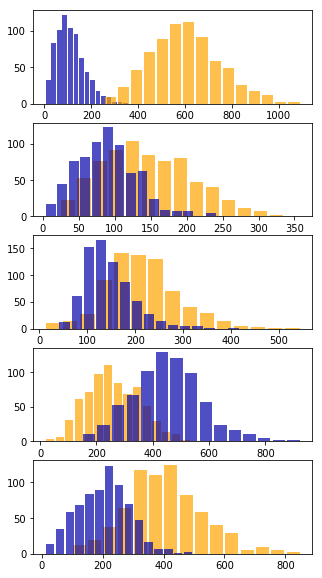

In [40]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize=(5,10))
ax1.hist(x=patients_day[10].mean(axis=1), bins=15, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
        
ax1.hist(x=control_day[1].mean(axis=1), bins=15, color='orange', 
                            alpha=0.7, rwidth=0.85)

ax2.hist(x=control_day[11].mean(axis=1), bins=15, color='orange',
                            alpha=0.7, rwidth=0.85)
ax2.hist(x=patients_day[11].mean(axis=1), bins=15, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
ax3.hist(x=control_day[5].mean(axis=1), bins=15, color='orange',
                            alpha=0.7, rwidth=0.85)
ax3.hist(x=patients_day[5].mean(axis=1), bins=15, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
ax4.hist(x=control_day[12].mean(axis=1), bins=15, color='orange',
                            alpha=0.7, rwidth=0.85)
ax4.hist(x=patients_day[12].mean(axis=1), bins=15, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
ax5.hist(x=control_day[14].mean(axis=1), bins=15, color='orange',
                            alpha=0.7, rwidth=0.85)
ax5.hist(x=patients_day[14].mean(axis=1), bins=15, color='#0504aa',
                                alpha=0.7, rwidth=0.85)

## Comparing boxplots of activity during the day

{'whiskers': [<matplotlib.lines.Line2D at 0x1254d53c8>,
 'caps': [<matplotlib.lines.Line2D at 0x128789208>,
 'boxes': [<matplotlib.lines.Line2D at 0x1184a7f60>,
 'medians': [<matplotlib.lines.Line2D at 0x128789ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x128789f28>,
 'means': []}

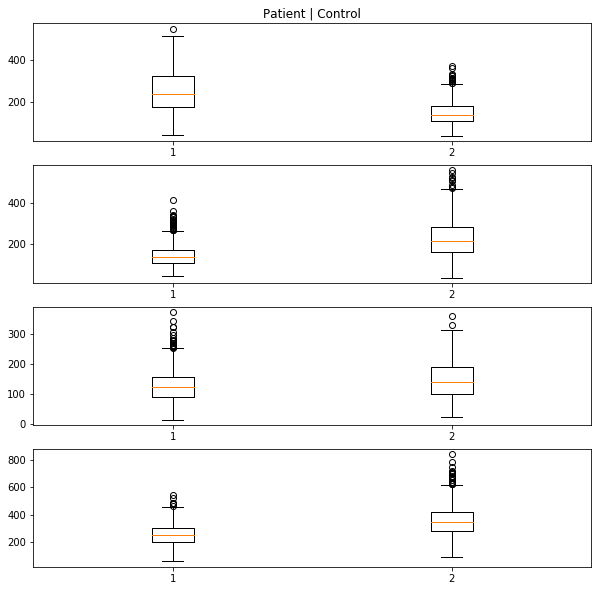

In [44]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10,10))
ax1.boxplot([patients_day[0].mean(axis=1),control_day[0].mean(axis=1)])
ax1.set_title('Patient | Control')
ax2.boxplot([patients_day[5].mean(axis=1),control_day[10].mean(axis=1)])
ax3.boxplot([patients_day[6].mean(axis=1),control_day[11].mean(axis=1)])
ax4.boxplot([patients_day[4].mean(axis=1),control_day[19].mean(axis=1)])

